In [254]:
import pandas as pd
import numpy as np

df = pd.read_csv("nba.csv")

In [255]:
df.head(100)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
95,Jeff Green,Los Angeles Clippers,8.0,SF,29.0,6-9,235.0,Georgetown,9650000.0
96,Blake Griffin,Los Angeles Clippers,32.0,PF,27.0,6-10,251.0,Oklahoma,18907726.0
97,Wesley Johnson,Los Angeles Clippers,33.0,SF,28.0,6-7,215.0,Syracuse,1100602.0
98,DeAndre Jordan,Los Angeles Clippers,6.0,C,27.0,6-11,265.0,Texas A&M,19689000.0


In [256]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [257]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [258]:
df['Number','Age'] = df['Number'].astype(float).astype("Int64")
df['Age'] = df['Age'].astype(float).astype("Int64")
df.dtypes


Name              object
Team              object
Number           float64
Position          object
Age                Int64
Height            object
Weight           float64
College           object
Salary           float64
(Number, Age)      Int64
dtype: object

In [259]:
df.isna()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,"(Number, Age)"
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False,False
455,False,False,False,False,False,False,False,True,False,False
456,False,False,False,False,False,False,False,False,False,False


In [260]:
df.isna().sum()

Name              1
Team              1
Number            1
Position          1
Age               1
Height            1
Weight            1
College          85
Salary           12
(Number, Age)     1
dtype: int64

In [261]:
df['College'].fillna("Not Available", inplace= True)
df.isna().sum()

Name              1
Team              1
Number            1
Position          1
Age               1
Height            1
Weight            1
College           0
Salary           12
(Number, Age)     1
dtype: int64

In [262]:
sal_mean = df['Salary'].mean()
df['Salary'].fillna(sal_mean, inplace= True)
df['Salary'] = df['Salary'].round(1)

In [263]:
df.isna().sum()

Name             1
Team             1
Number           1
Position         1
Age              1
Height           1
Weight           1
College          0
Salary           0
(Number, Age)    1
dtype: int64

In [264]:
df = df.dropna()

In [265]:
df.isna().sum()

Name             0
Team             0
Number           0
Position         0
Age              0
Height           0
Weight           0
College          0
Salary           0
(Number, Age)    0
dtype: int64

In [266]:
df['Height'] = df['Height'].replace('-', '.', regex=True)
df['Height'] = df['Height'].astype(float)
df['Height'] = df['Height'].round(1) 
df.head(100)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,"(Number, Age)"
0,Avery Bradley,Boston Celtics,0.0,PG,25,6.2,180.0,Texas,7730337.0,0
1,Jae Crowder,Boston Celtics,99.0,SF,25,6.6,235.0,Marquette,6796117.0,99
2,John Holland,Boston Celtics,30.0,SG,27,6.5,205.0,Boston University,4842684.1,30
3,R.J. Hunter,Boston Celtics,28.0,SG,22,6.5,185.0,Georgia State,1148640.0,28
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,6.1,231.0,Not Available,5000000.0,8
...,...,...,...,...,...,...,...,...,...,...
95,Jeff Green,Los Angeles Clippers,8.0,SF,29,6.9,235.0,Georgetown,9650000.0,8
96,Blake Griffin,Los Angeles Clippers,32.0,PF,27,6.1,251.0,Oklahoma,18907726.0,32
97,Wesley Johnson,Los Angeles Clippers,33.0,SF,28,6.7,215.0,Syracuse,1100602.0,33
98,DeAndre Jordan,Los Angeles Clippers,6.0,C,27,6.1,265.0,Texas A&M,19689000.0,6


# Printing statistics for each field

In [267]:
def statistics(col_name,data):
    print("| COLUMN {0} :-> ".format(col_name.upper()))
    print("| Mean of {0} column   : ".format(col_name),data.mean())
    print("| Median of {0} column : ".format(col_name),data.median())
    print("| Min from {0} column  : ".format(col_name),data.min())
    print("| Max from {0} column  : ".format(col_name),data.max())
    print("| Standard Deviation      : ".format(col_name),data.std())
    print("\n")

fields = ["Age","Number","Height","Weight","Salary"]
for i in fields:
    statistics(i,df[i])

| COLUMN AGE :-> 
| Mean of Age column   :  26.938730853391686
| Median of Age column :  26.0
| Min from Age column  :  19
| Max from Age column  :  40
| Standard Deviation      :  4.404016424405833


| COLUMN NUMBER :-> 
| Mean of Number column   :  17.678336980306344
| Median of Number column :  13.0
| Min from Number column  :  0.0
| Max from Number column  :  99.0
| Standard Deviation      :  15.966090405679639


| COLUMN HEIGHT :-> 
| Mean of Height column   :  6.516192560175047
| Median of Height column :  6.6
| Min from Height column  :  5.1
| Max from Height column  :  7.3
| Standard Deviation      :  0.35349190124071295


| COLUMN WEIGHT :-> 
| Mean of Weight column   :  221.52297592997812
| Median of Weight column :  220.0
| Min from Weight column  :  161.0
| Max from Weight column  :  307.0
| Standard Deviation      :  26.36834262669547


| COLUMN SALARY :-> 
| Mean of Salary column   :  4842684.10525164
| Median of Salary column :  2869440.0
| Min from Salary column  :  308

# Creating List 'Age_Group'

In [268]:
age_groups = []
for i in df["Age"]:
    if i>=18 and i<25:age_groups.append("Young")
    elif i>=25 and i<35:age_groups.append("Middle Aged")
    else:age_groups.append("Old")    
df["Age_Group"] = age_groups
    

In [269]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,"(Number, Age)",Age_Group
0,Avery Bradley,Boston Celtics,0.0,PG,25,6.2,180.0,Texas,7730337.0,0,Middle Aged
1,Jae Crowder,Boston Celtics,99.0,SF,25,6.6,235.0,Marquette,6796117.0,99,Middle Aged
2,John Holland,Boston Celtics,30.0,SG,27,6.5,205.0,Boston University,4842684.1,30,Middle Aged
3,R.J. Hunter,Boston Celtics,28.0,SG,22,6.5,185.0,Georgia State,1148640.0,28,Young
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,6.1,231.0,Not Available,5000000.0,8,Middle Aged


# Printing Stats based on created Age Group field.

In [270]:
age_grouped_data = df.groupby("Age_Group")
print("Mean Across Age Groups : ")
age_grouped_data.mean()

Mean Across Age Groups : 


,Number,Age,Height,Weight,Salary,"(Number, Age)"
Age_Group,,,,,,
Middle Aged,17.531365,28.332103,6.487454,222.793358,6.137689e+06,17.531365
Old,21.125000,36.65625,6.565625,225.312500,3.890327e+06,21.125
Young,17.220779,22.467532,6.556494,218.500000,2.761705e+06,17.220779


In [271]:
print("Median Across Age Groups : ")
age_grouped_data.median()

Median Across Age Groups : 


,Number,Age,Height,Weight,Salary,"(Number, Age)"
Age_Group,,,,,,
Middle Aged,12.0,28.0,6.50,225.0,4300000.0,12.0
Old,21.5,36.0,6.65,229.0,2877470.0,21.5
Young,13.0,23.0,6.60,216.5,1721379.5,13.0


In [272]:
print("Min Across Age Groups : ")
age_grouped_data.min()

Min Across Age Groups : 


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,"(Number, Age)"
Age_Group,,,,,,,,,,
Middle Aged,Aaron Brooks,Atlanta Hawks,0.0,C,25,5.1,161.0,Alabama,55722.0,0
Old,Andre Miller,Atlanta Hawks,1.0,C,35,6.1,172.0,Arizona,222888.0,1
Young,Aaron Gordon,Atlanta Hawks,0.0,C,19,5.1,165.0,Arizona,30888.0,0


In [273]:
print("Max Across Age Groups : ")
age_grouped_data.max()

Max Across Age Groups : 


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,"(Number, Age)"
Age_Group,,,,,,,,,,
Middle Aged,Zaza Pachulia,Washington Wizards,99.0,SG,34,7.3,307.0,Wisconsin,22970500.0,99
Old,Vince Carter,Toronto Raptors,42.0,SG,40,7.0,260.0,Xavier,25000000.0,42
Young,Zach LaVine,Washington Wizards,92.0,SG,24,7.3,280.0,Wyoming,16407501.0,92


In [274]:
print("Standard Deviation Across Age Groups : ")
age_grouped_data.std()

Standard Deviation Across Age Groups : 


,Number,Age,Height,Weight,Salary,"(Number, Age)"
Age_Group,,,,,,
Middle Aged,16.656606,2.602072,0.369571,27.379935,5.728104e+06,16.656606
Old,11.746654,1.618629,0.305445,23.349294,4.495571e+06,11.746654
Young,15.474308,1.419605,0.329968,24.975609,3.164929e+06,15.474308


<AxesSubplot:xlabel='Age_Group'>

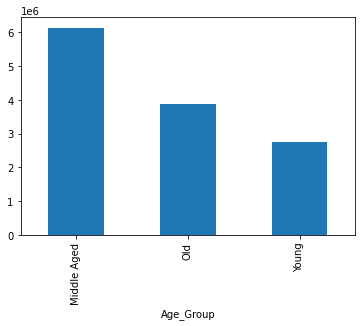

In [275]:
age_grouped_data["Salary"].mean().plot.bar()

<AxesSubplot:xlabel='Age_Group'>

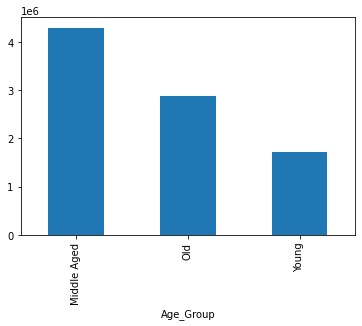

In [276]:
age_grouped_data["Salary"].median().plot.bar()

<AxesSubplot:xlabel='Age_Group'>

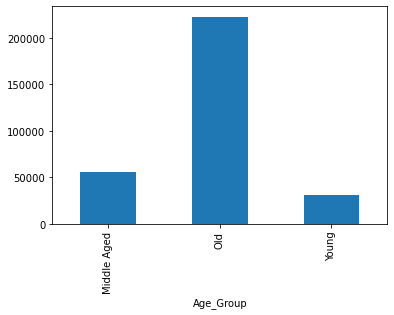

In [277]:
age_grouped_data["Salary"].min().plot.bar()

<AxesSubplot:xlabel='Age_Group'>

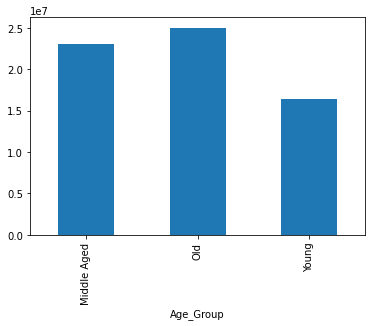

In [278]:
age_grouped_data["Salary"].max().plot.bar()

<AxesSubplot:xlabel='Age_Group'>

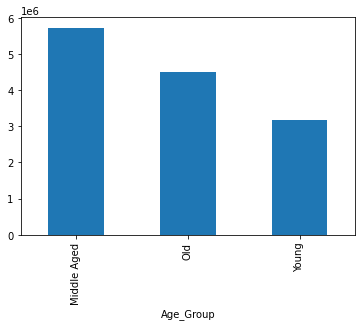

In [279]:
age_grouped_data["Salary"].std().plot.bar()

# Part - II (Processing IRIS Dataset)

In [280]:
iris_df = pd.read_csv("iris.csv")

In [289]:
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [291]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [292]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Printing statistics grouped by 'Species'  

In [282]:
iris_df.groupby("Species").mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,14.57738,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,14.57738,0.516171,0.313798,0.469911,0.197753
Iris-virginica,14.57738,0.635880,0.322497,0.551895,0.274650


In [283]:
iris_df.groupby("Species").median()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,125.5,6.5,3.0,5.55,2.0


In [284]:
iris_df.groupby("Species").min()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,4.3,2.3,1.0,0.1
Iris-versicolor,51,4.9,2.0,3.0,1.0
Iris-virginica,101,4.9,2.2,4.5,1.4


In [285]:
iris_df.groupby("Species").max()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,5.8,4.4,1.9,0.6
Iris-versicolor,100,7.0,3.4,5.1,1.8
Iris-virginica,150,7.9,3.8,6.9,2.5


In [286]:
iris_df.groupby("Species").std()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,14.57738,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,14.57738,0.516171,0.313798,0.469911,0.197753
Iris-virginica,14.57738,0.635880,0.322497,0.551895,0.274650


In [ ]:
iris_df.groupby()